<a href="https://colab.research.google.com/github/anaipsilva/TESE/blob/main/cnn_primeira_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import keras as keras
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [4]:
train_df=pd.read_csv("/content/drive/MyDrive/TESE/X_train.csv")
valid_df=pd.read_csv("/content/drive/MyDrive/TESE/X_val.csv")

In [5]:
valid_df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,144,128,108,116,127,135,162,154,117,100,...,116,160,157,112,121,104,90,91,88,95
1,142,120,108,120,139,163,190,175,138,129,...,140,167,151,89,104,83,82,94,87,81
2,131,117,116,120,126,146,156,152,150,146,...,109,136,139,122,101,64,62,71,74,82
3,129,125,119,109,104,128,134,145,142,119,...,74,91,118,131,117,95,73,64,70,84
4,120,116,109,109,126,172,187,168,129,98,...,72,75,89,103,116,135,98,78,76,77


In [6]:
x_train=train_df.values
x_valid=valid_df.values

In [7]:
x_train.shape
x_valid.shape

(33, 10000)

In [21]:
ytrain_df=pd.read_csv("/content/drive/MyDrive/TESE/labels_train.csv")
yvalid_df=pd.read_csv("/content/drive/MyDrive/TESE/labels_test.csv")

In [22]:
y_train=ytrain_df.values
y_valid=yvalid_df.values

In [28]:
x_train.shape

(85, 10000)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


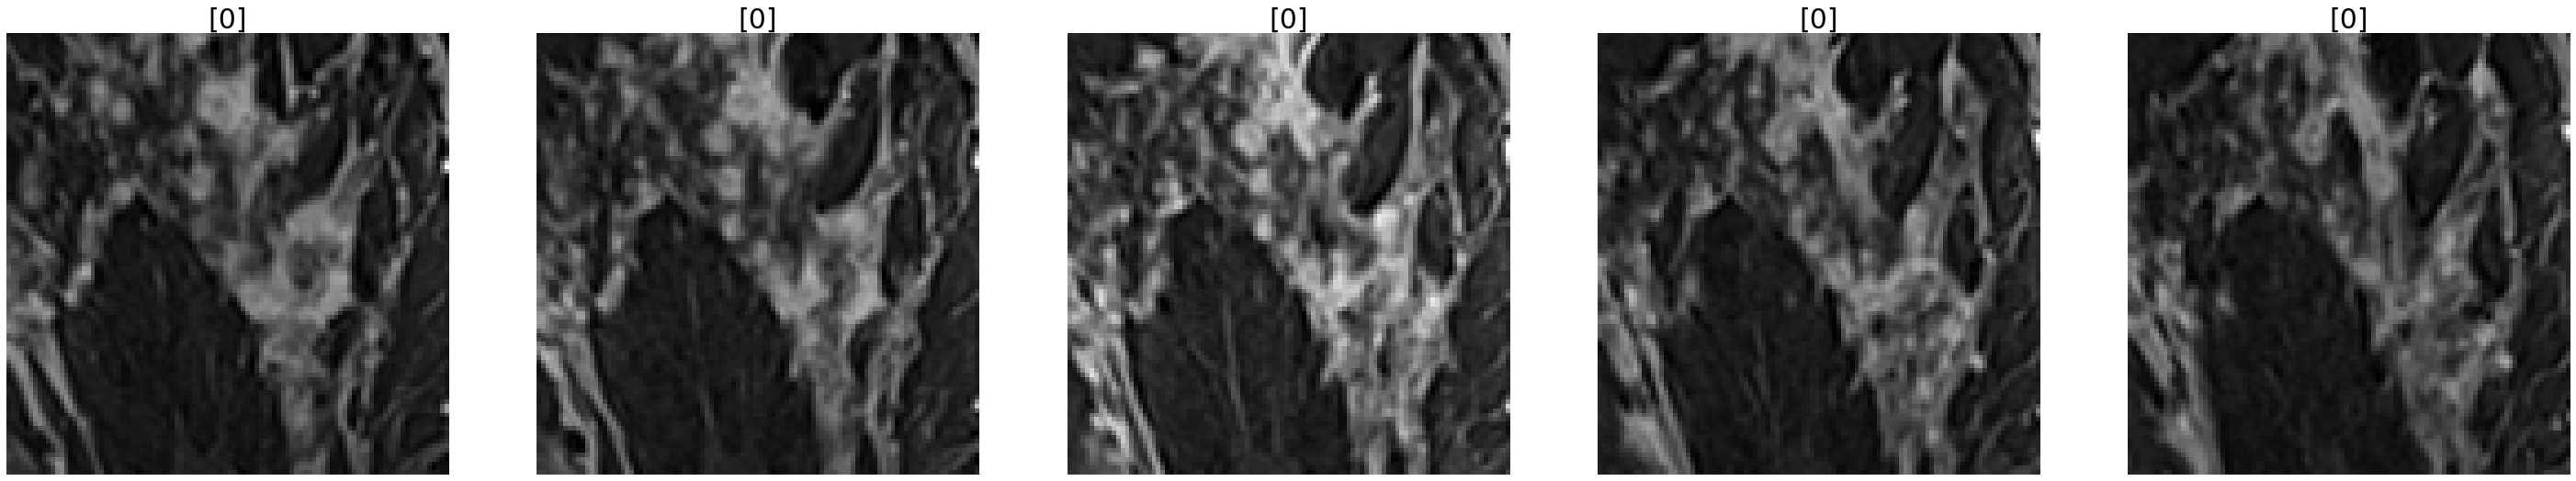

In [29]:
plt.figure(figsize=(50,50))

num_images = 5
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(100,100)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [30]:
x_train.min()

0

In [31]:
x_train.max()

4621

In [32]:
x_train=train_df.values / 4621
x_valid=valid_df.values / 4621


In [33]:
num_classes=2
if not y_train.shape[-1] == 24:
  y_train=keras.utils.np_utils.to_categorical(y_train, num_classes)
  y_valid=keras.utils.np_utils.to_categorical(y_valid, num_classes)

In [34]:
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(10000,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               5120512   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 5,384,194
Trainable params: 5,384,194
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='categorical_crossentropy', metrics=['binary_accuracy'])

In [37]:
history=model.fit(x_train, y_train, epochs= 20, verbose=1, validation_data=(x_valid, y_valid))

ValueError: ignored

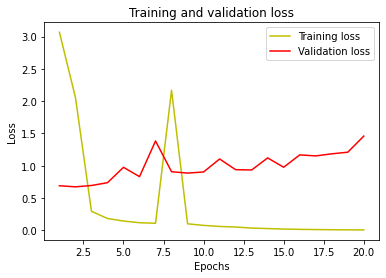

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()